# Exploratory Data Analysis

TO DOS:
- actually study these figures
- consolidate into final NB

In [1]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
from itertools import permutations

Read in data

In [2]:
train_values = pd.read_csv('data/train_values.csv')
train_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [3]:
train_labels = pd.read_csv('data/train_labels.csv')
train_labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


Merge the two dfs

In [4]:
train = pd.merge(train_values, train_labels, on="patient_id")
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


Set index to `patient_id`

In [5]:
train = train.set_index('patient_id')
train.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


Replace `thal` values with numbers. 
- `normal`: 0
- `fixed_defect`: 1
- `reversible_defect`: 2

In [6]:
train['thal'] = train['thal'].replace('normal', 0)
train['thal'] = train['thal'].replace('fixed_defect', 1)
train['thal'] = train['thal'].replace('reversible_defect', 2)
train.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


Plot the distribution of `heart_disease_present`

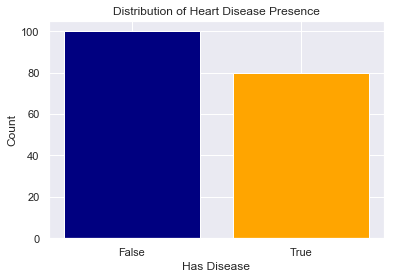

In [7]:
data = train['heart_disease_present'].value_counts().values
title='Distribution of Heart Disease Presence'
bars = ('False', 'True')
y_pos = np.arange(len(bars))
plt.bar(y_pos, data, color=['navy', 'orange'])
plt.xticks(y_pos, bars)
plt.title(title)
plt.xlabel('Has Disease')
plt.ylabel('Count')
plt.show()

The data is pretty well-balanced, so we don't need to take any steps to equalize the classes when we train our models.

Iterate through variables and plot their distributions. First plot the categorical variables with histograms. 

In [8]:
histo_vars = ['thal', 'exercise_induced_angina', 'num_major_vessels', 'chest_pain_type', 'slope_of_peak_exercise_st_segment', 'sex', 'resting_ekg_results', 'fasting_blood_sugar_gt_120_mg_per_dl']
bar_names = {}
bar_names['thal'] = ['', 'normal', 'fixed_defect', 'reversible_defect', '']
bar_names['fasting_blood_sugar_gt_120_mg_per_dl'] = ['', 'False', 'True', '']
bar_names['sex'] = ['', 'Female', 'Male', '']
bar_names['exercise_induced_angina'] = ['', 'False', 'True', '']

In [9]:
try:
    bar_names['dss']
    print('hello')
except:
    print('bye')

bye


In [10]:
def plot_histogram(x_axes, ax, df, var, title=''):
    # Be sure to only pick integer tick locations.
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))
    data = df[var]
    d = np.diff(np.unique(data)).min()
    left_of_first_bin = data.min() - float(d)/2
    right_of_last_bin = data.max() + float(d)/2
    bins = np.arange(left_of_first_bin, right_of_last_bin + d, d)
    ax.hist(data, bins)
    ax.set(xlabel=var, ylabel='Count')
    try:
        x_axes[var] = ax.get_xticks()
        ax.set_xticklabels(bar_names[var])
    except:
        x_axes[var] = ax.get_xticks()
    if title:
        ax.set(title=title)
    ax.xaxis.labelpad = 10
    return x_axes

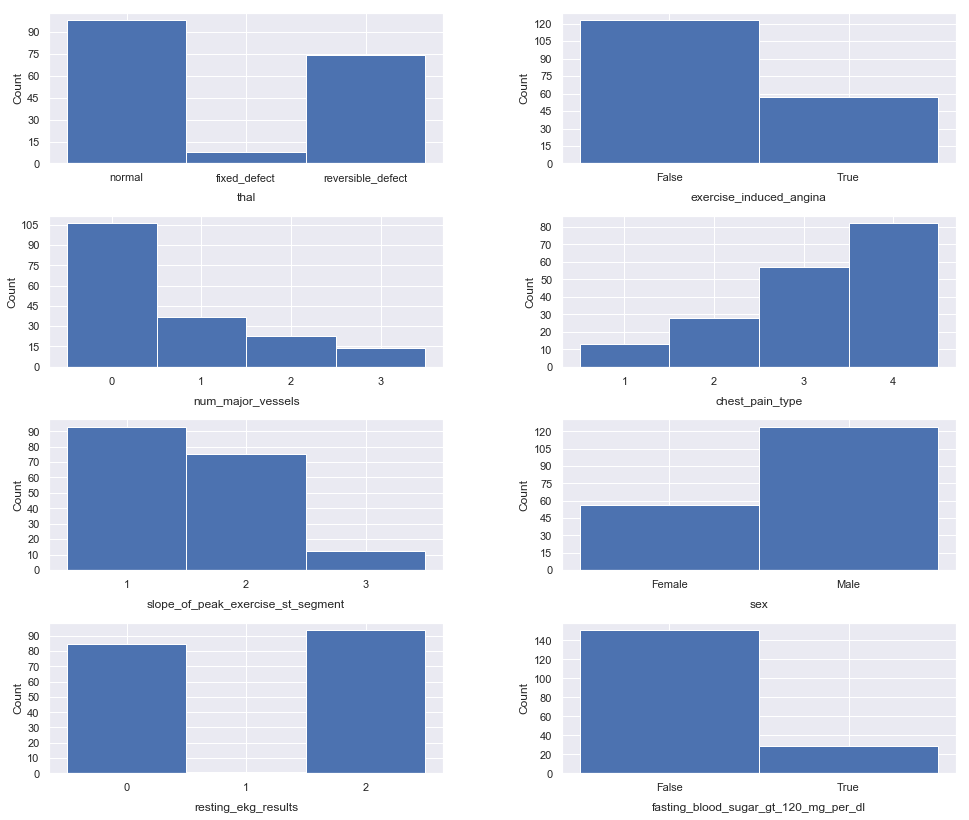

In [11]:
fig, axarr = plt.subplots(4, 2, figsize=(14,12))
x_axes = {}
counter = 0
for i in range(4):
    for j in range(2):
        x_axes = plot_histogram(x_axes=x_axes, ax=axarr[i, j], df=train, var=histo_vars[counter])
        counter += 1
plt.subplots_adjust(bottom=0, left=0, wspace=0.3, hspace=0.35)

Then plot the distributions of the quantitative variables with PMFs and CDFs. 

In [12]:
pmf_vars = ['oldpeak_eq_st_depression', 'max_heart_rate_achieved', 'age', 'serum_cholesterol_mg_per_dl', 'resting_blood_pressure']

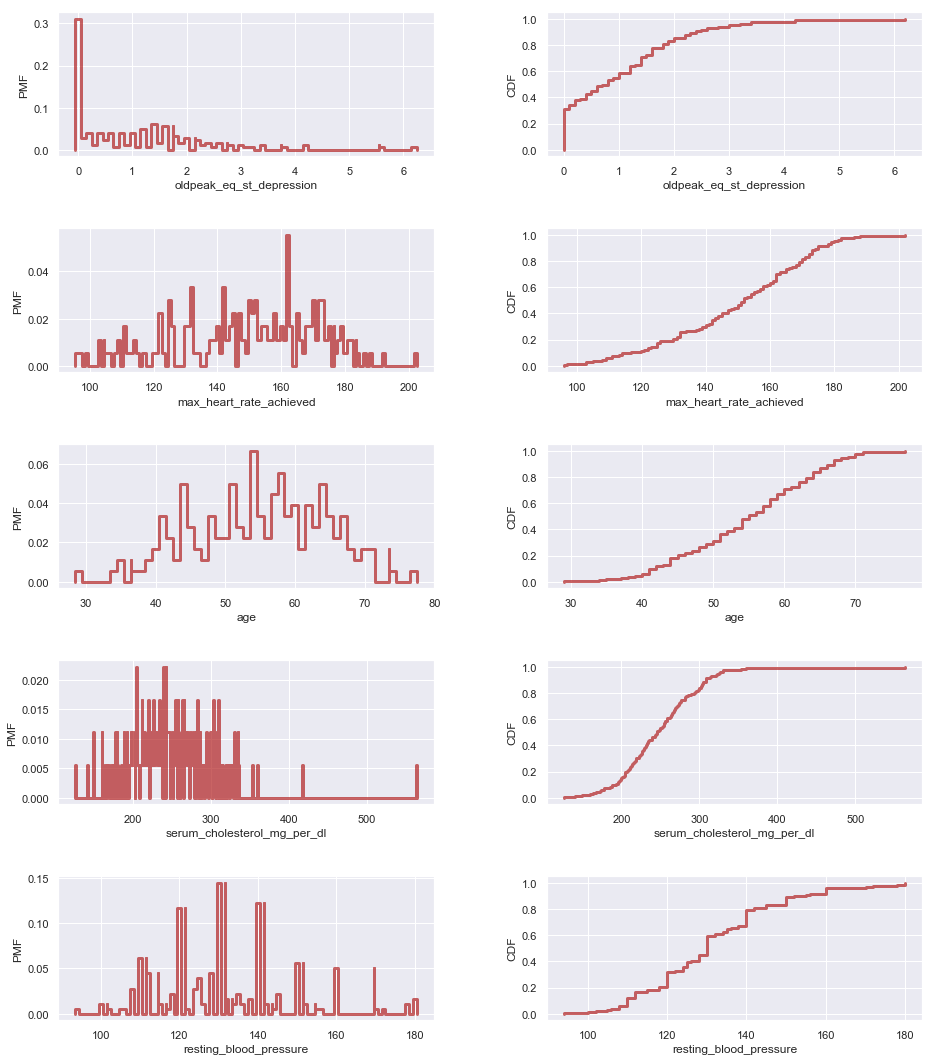

<Figure size 576x432 with 0 Axes>

In [13]:
thinkplot.Figure(figsize=(12, 14))

thinkplot.PrePlot(num=1, rows=5, cols=2)

for i in range(1, 11):
    thinkplot.SubPlot(i, label=str(i))
    counter = int((i-1)/2)
    var = pmf_vars[counter]
    
    if (i-1)%2 == 0:
        pmf = thinkstats2.Pmf(train[var])
        thinkplot.Pmf(pmf, color='firebrick')
        thinkplot.Config(xlabel=var, ylabel='PMF')
    else: 
        # Plot CDF
        cdf = thinkstats2.Cdf(train[var])
        thinkplot.Cdf(cdf, color='firebrick')
        thinkplot.Config(xlabel=var, ylabel='CDF')
        
thinkplot.tight_layout(wspace=0.3, hspace=0.5)
thinkplot.Show()

Plot distributions for presence of heart disease groups. First we do the categorical variables and then the quantitative ones. 

In [14]:
heart_disease = train[train['heart_disease_present']==1]
no_heart_disease = train[train['heart_disease_present']==0]

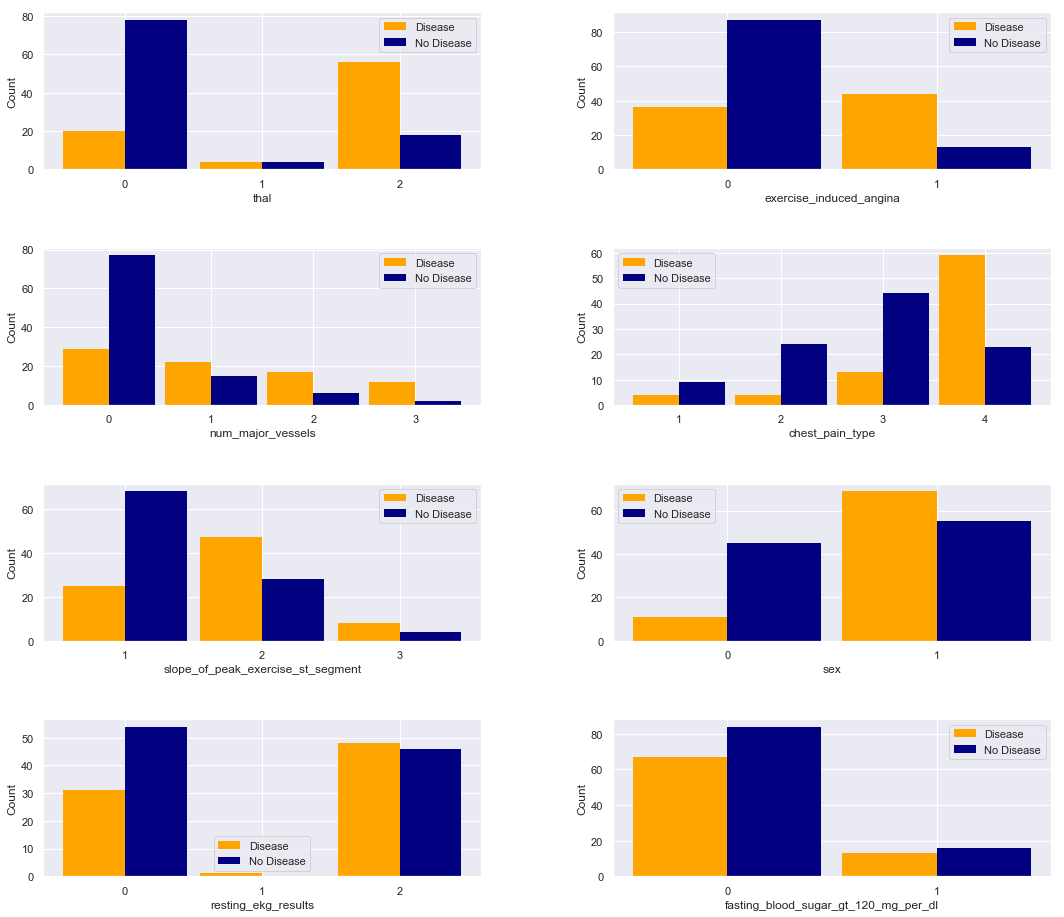

<Figure size 576x432 with 0 Axes>

In [15]:
thinkplot.Figure(figsize=(14, 12))

thinkplot.PrePlot(num=2, rows=4, cols=2)

width = 0.45

for i in range(1, 9):
    thinkplot.SubPlot(i, label=str(i))
    counter = i-1
    var = histo_vars[counter]
    heart_disease_hist = thinkstats2.Hist(heart_disease[var], label='Disease')
    no_heart_disease_hist = thinkstats2.Hist(no_heart_disease[var], label='No Disease')
    thinkplot.Hist(heart_disease_hist, align='right', width=width, color='orange', alpha=1)
    thinkplot.Hist(no_heart_disease_hist, align='left', width=width, color='navy', alpha=1)
    x_ticks = x_axes[var][1:-1]
    thinkplot.Config(xlabel=var, ylabel='Count', xticks=x_ticks)
    
thinkplot.tight_layout(bottom=0, left=0, wspace=0.3, hspace=0.5)
thinkplot.Show()

TODO: beautify with better colors, var names, and xtick names. We can save the tick names from previous histogram subplots and just use those in `Config` for the new histograms. Just put something like `xticks=[1, 2, 3, 4]` in `Config` 

can also modify tick names so they make more sense (i.e. for `thal`).

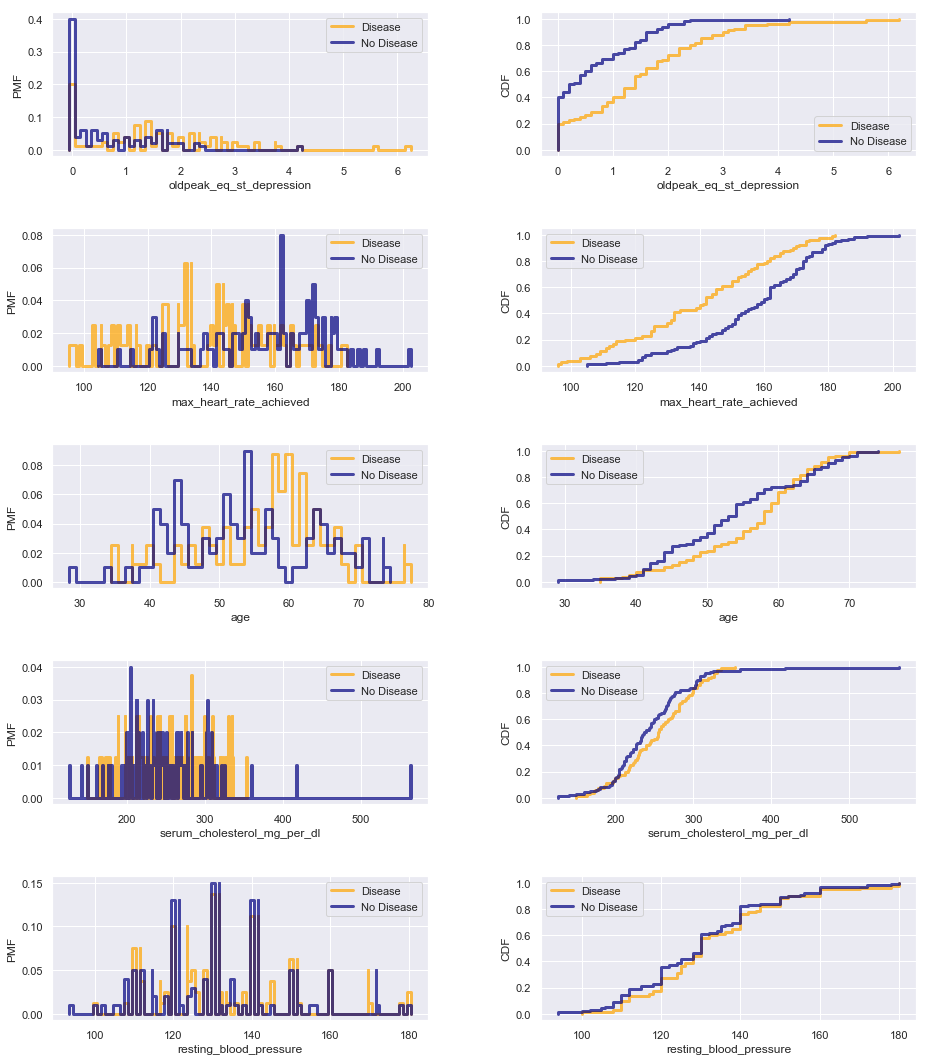

<Figure size 576x432 with 0 Axes>

In [16]:
thinkplot.Figure(figsize=(12, 14))

thinkplot.PrePlot(num=2, rows=5, cols=2)

for i in range(1, 11):
    thinkplot.SubPlot(i, label=str(i))
    counter = int((i-1)/2)
    var = pmf_vars[counter]
    
    if (i-1)%2 == 0:
        pmf_disease = thinkstats2.Pmf(heart_disease[var], label='Disease')
        pmf_no_disease = thinkstats2.Pmf(no_heart_disease[var], label='No Disease')
        thinkplot.Pmf(pmf_disease, color='orange')
        thinkplot.Pmf(pmf_no_disease, color='navy')
        thinkplot.Config(xlabel=var, ylabel='PMF')
    else: 
        # Plot CDF
        cdf_disease = thinkstats2.Cdf(heart_disease[var], label='Disease')
        cdf_no_disease = thinkstats2.Cdf(no_heart_disease[var], label='No Disease')
        thinkplot.Cdf(cdf_disease, color='orange')
        thinkplot.Cdf(cdf_no_disease, color='navy')
        thinkplot.Config(xlabel=var, ylabel='CDF')
        
thinkplot.tight_layout(wspace=0.3, hspace=0.5)
thinkplot.Show()

Plot relationships between quantitative variables with presence of heart disease groups. First we need to get all permutations of `pmf_vars`.

In [17]:
perm = list(permutations(pmf_vars, 2))

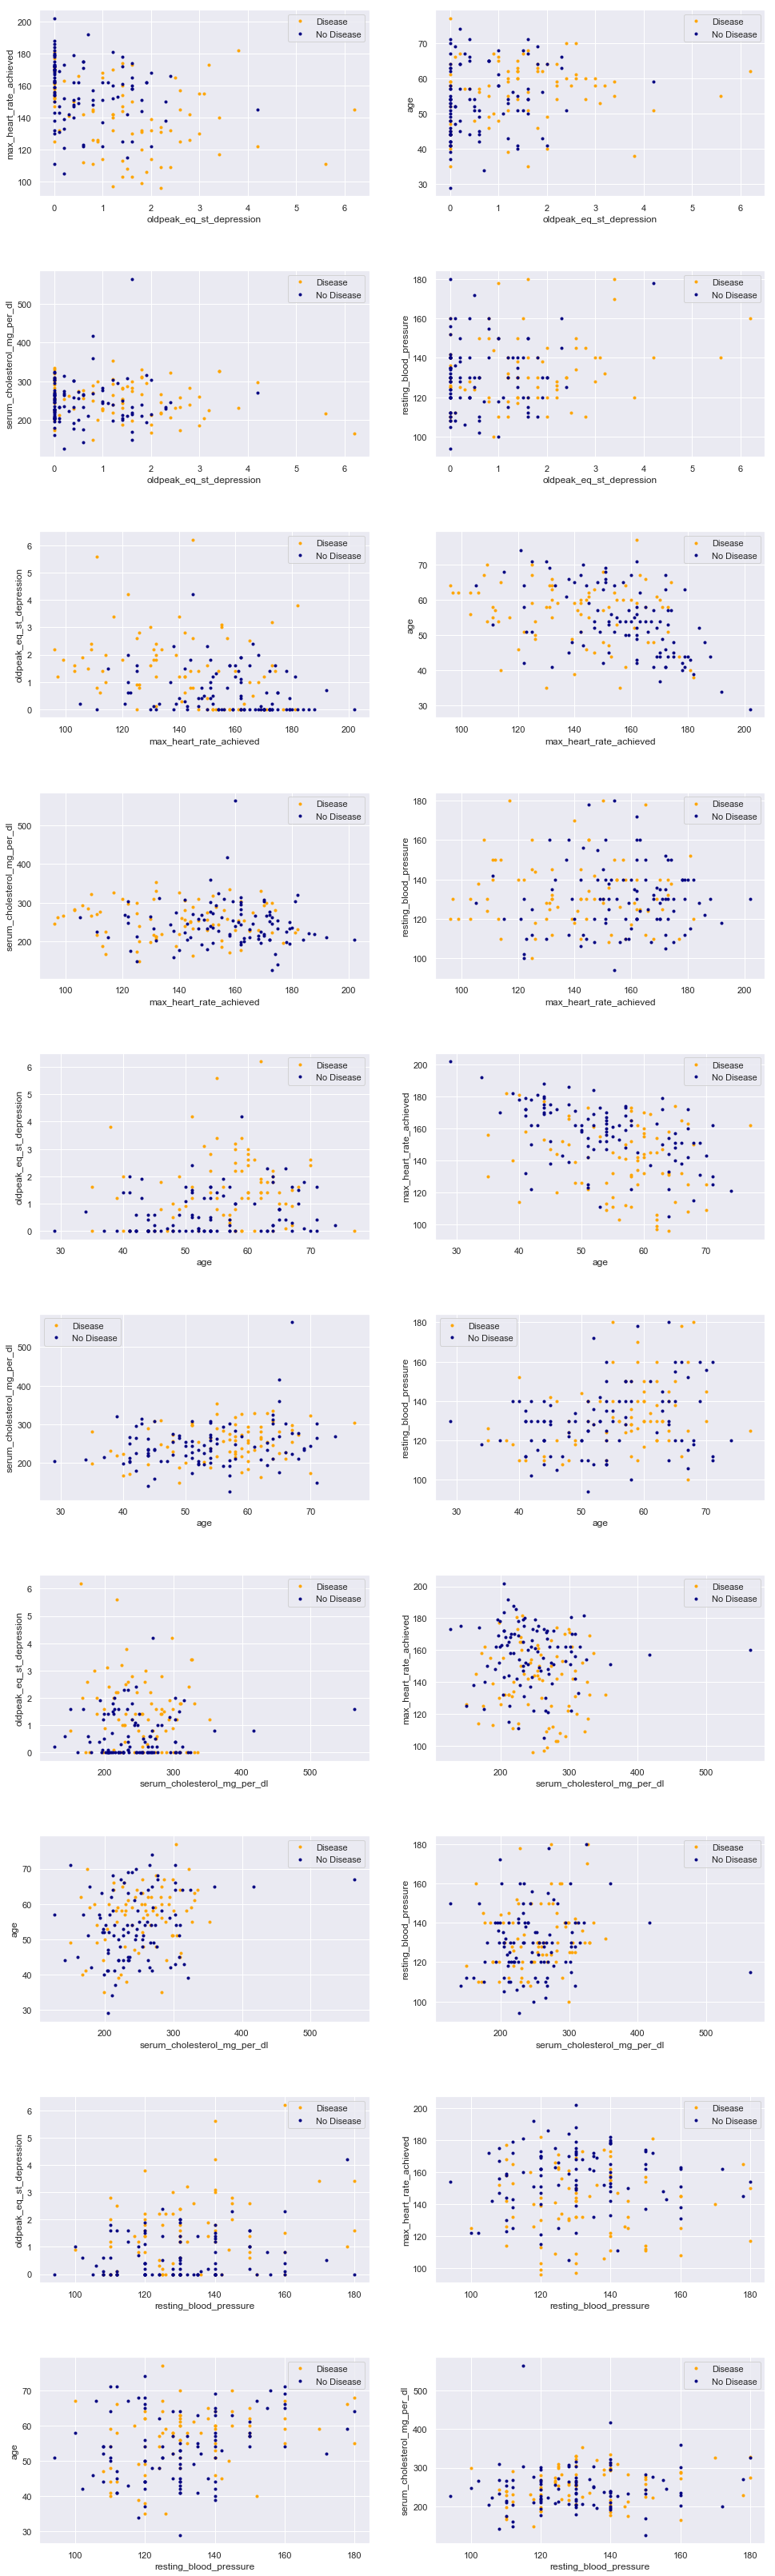

In [18]:
fig, axarr = plt.subplots(10, 2, figsize=(14,50))
counter = 0
for i in range(10):
    for j in range(2):
        ax = axarr[i, j]
        pair = perm[counter]
        x_var = pair[0]
        y_var = pair[1]
        x_disease, y_disease = heart_disease[x_var], heart_disease[y_var]
        ax.plot(x_disease, y_disease, '.', alpha=1, label='Disease', color='orange')
        x_no_disease, y_no_disease = no_heart_disease[x_var], no_heart_disease[y_var]
        ax.plot(x_no_disease, y_no_disease, '.', alpha=1, label='No Disease', color='navy')
        ax.legend()
        ax.set(xlabel=x_var, ylabel=y_var)
        counter += 1
        
plt.subplots_adjust(bottom=0, left=0, wspace=0.2, hspace=0.4)

TODO: add noise, make a common legend (applicable to other subplots as well)

Deal with zero inflation

In [19]:
have_oldpeak = train[train['oldpeak_eq_st_depression'] > 0]
no_oldpeak = train[train['oldpeak_eq_st_depression'] == 0]

have_oldpeak['have_oldpeak'] = 1
no_oldpeak['have_oldpeak'] = 0

no_oldpeak['oldpeak_eq_st_depression'] = np.nan

frames = [have_oldpeak, no_oldpeak]
train = pd.concat(frames)

heart = train.pop('heart_disease_present')
train['heart_disease_present'] = heart

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [20]:
train.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,have_oldpeak,heart_disease_present
patient_id,,,,,,,,,,,,,,,
l0c19s,1,2,142,4,0,0,2,226,NaN,1,53,111,1,0,0
lcexsf,1,0,152,3,1,0,0,277,NaN,0,67,172,0,0,0
y3m2bd,1,2,132,4,0,0,0,207,NaN,1,57,168,1,0,0
0xw93k,1,0,124,3,2,1,0,255,NaN,1,48,175,0,0,0
2nx10r,1,0,160,3,1,0,0,201,NaN,0,54,163,0,0,0


Plot `have_oldpeak`

In [21]:
heart_disease = train[train['heart_disease_present']==1]
no_heart_disease = train[train['heart_disease_present']==0]

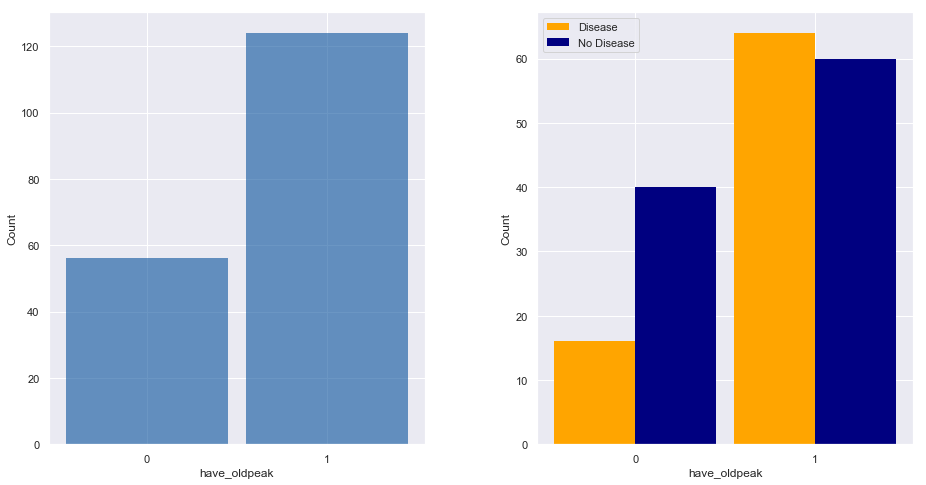

<Figure size 576x432 with 0 Axes>

In [22]:
thinkplot.Figure(figsize=(6, 8))

thinkplot.PrePlot(num=2, rows=1, cols=2)

width = 0.45

var = 'have_oldpeak'

for i in range(1, 3):
    thinkplot.SubPlot(i, label=str(i))
    if i == 1:
        hist = thinkstats2.Hist(train[var])
        thinkplot.Hist(hist)
        thinkplot.Config(xlabel=var, ylabel='Count', xticks=[0, 1])
    else:
        heart_disease_hist = thinkstats2.Hist(heart_disease[var], label='Disease')
        no_heart_disease_hist = thinkstats2.Hist(no_heart_disease[var], label='No Disease')
        thinkplot.Hist(heart_disease_hist, align='right', width=width, color='orange', alpha=1)
        thinkplot.Hist(no_heart_disease_hist, align='left', width=width, color='navy', alpha=1)
        thinkplot.Config(xlabel=var, ylabel='Count', xticks=[0, 1])
    
thinkplot.tight_layout(bottom=0, left=0, wspace=0.3)
thinkplot.Show()

In [23]:
int(1/2) 

0

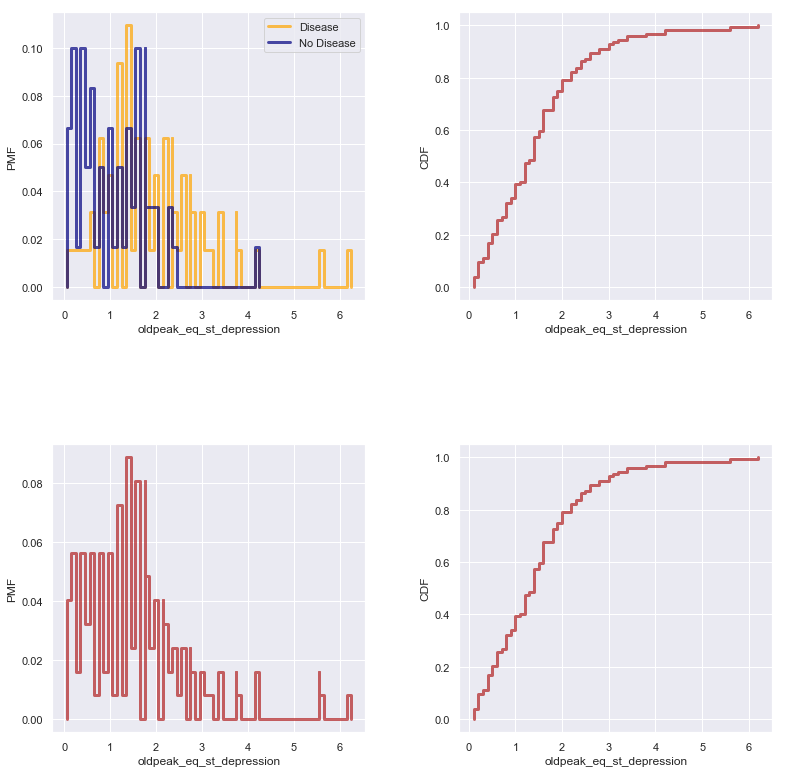

<Figure size 576x432 with 0 Axes>

In [24]:
thinkplot.Figure(figsize=(6, 7))

thinkplot.PrePlot(num=2, rows=2, cols=2)

var = 'oldpeak_eq_st_depression'

for i in range(1, 5):
    thinkplot.SubPlot(i, label=str(i))
    
    if (i-1)%2 == 0:
        if int(i/2) > 0:
            pmf = thinkstats2.Pmf(train[var])
            thinkplot.Pmf(pmf, color='firebrick')
            thinkplot.Config(xlabel=var, ylabel='PMF')
        else:
            pmf_disease = thinkstats2.Pmf(heart_disease[var], label='Disease')
            pmf_no_disease = thinkstats2.Pmf(no_heart_disease[var], label='No Disease')
            thinkplot.Pmf(pmf_disease, color='orange')
            thinkplot.Pmf(pmf_no_disease, color='navy')
            thinkplot.Config(xlabel=var, ylabel='PMF')
    else:
        if int(i/2) > 0:
            cdf = thinkstats2.Cdf(train[var])
            thinkplot.Cdf(cdf, color='firebrick')
            thinkplot.Config(xlabel=var, ylabel='CDF')
        else:
            cdf_disease = thinkstats2.Cdf(heart_disease[var], label='Disease')
            cdf_no_disease = thinkstats2.Cdf(no_heart_disease[var], label='No Disease')
            thinkplot.Cdf(cdf_disease, color='orange')
            thinkplot.Cdf(cdf_no_disease, color='navy')
            thinkplot.Config(xlabel=var, ylabel='CDF')
        
thinkplot.tight_layout(wspace=0.3, hspace=0.5)
thinkplot.Show()

Dating Mining Again

In [26]:
categorical = ['thal', 'fasting_blood_sugar_gt_120_mg_per_dl', 'sex', 'exercise_induced_angina', 'have_oldpeak']
t = []
for var in train.columns[:-1]:
    if var in categorical:
        formula = 'heart_disease_present ~ C(' + var + ')'
    else:
        formula = 'heart_disease_present ~ ' + var
    model = smf.logit(formula, data=train)
    results = model.fit()

    t.append((results.prsquared, var))
    
t.sort(reverse=True)
for r2, name in t:
    print(name, r2)

Optimization terminated successfully.
         Current function value: 0.625662
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.534380
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.683881
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.591042
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.592361
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686956
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676261
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683772
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.606476
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627229
  

In [ ]:
perm = list(permutations(pmf_vars, 2))

In [ ]:
fig, axarr = plt.subplots(10, 2, figsize=(14,50))
counter = 0
for i in range(10):
    for j in range(2):
        ax = axarr[i, j]
        pair = perm[counter]
        x_var = pair[0]
        y_var = pair[1]
        x_disease, y_disease = heart_disease[x_var], heart_disease[y_var]
        ax.plot(x_disease, y_disease, '.', alpha=1, label='Disease', color='orange')
        x_no_disease, y_no_disease = no_heart_disease[x_var], no_heart_disease[y_var]
        ax.plot(x_no_disease, y_no_disease, '.', alpha=1, label='No Disease', color='navy')
        ax.legend()
        ax.set(xlabel=x_var, ylabel=y_var)
        counter += 1
        
plt.subplots_adjust(bottom=0, left=0, wspace=0.2, hspace=0.4)